# TP2: Machine Learning

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
# import ML packages
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import metrics
from sklearn import neural_network
# import Plotting pckgs
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
trainingSet = pd.read_csv('../CSVs/improved_trip_train.csv')
testingSet = pd.read_csv('../CSVs/improved_trip_test.csv')
testingOriginal = pd.read_csv('../CSVs/trip_test.csv')

trainingSet.dtypes

id                                             int64
duration                                     float64
start_date                                    object
start_dayOfWeek                                int64
start_week                                     int64
start_quarter                                  int64
start_time                                    object
start_hour                                     int64
start_minute                                   int64
start_station_name                            object
start_station_id                               int64
end_date                                      object
end_dayOfWeek                                  int64
end_week                                       int64
end_quarter                                    int64
end_time                                      object
end_hour                                       int64
end_minute                                     int64
end_station_name                              

In [3]:
list(trainingSet.columns.values)

['id',
 'duration',
 'start_date',
 'start_dayOfWeek',
 'start_week',
 'start_quarter',
 'start_time',
 'start_hour',
 'start_minute',
 'start_station_name',
 'start_station_id',
 'end_date',
 'end_dayOfWeek',
 'end_week',
 'end_quarter',
 'end_time',
 'end_hour',
 'end_minute',
 'end_station_name',
 'end_station_id',
 'bike_id',
 'subscription_type',
 'zip_code',
 'distance',
 'historical',
 'viajes',
 'max_temperature_c',
 'min_temperature_c',
 'max_humidity',
 'max_sea_level_pressure_cm',
 'precipitation_cm',
 'Fog',
 'Normal',
 'Rain',
 'business_day',
 'holiday',
 'year',
 'month',
 'weekday',
 'start Harry Bridges Plaza (Ferry Building)',
 'start Market at Sansome',
 'start San Francisco Caltrain 2 (330 Townsend)',
 'start Market at 10th',
 'start Townsend at 7th',
 'start Powell at Post (Union Square)',
 'start 2nd at Folsom',
 'start San Francisco Caltrain (Townsend at 4th)',
 'start 2nd at Townsend',
 'start Beale at Market',
 'start Embarcadero at Bryant',
 'start Temporary T

In [ ]:
testingOriginal.dtypes

## Aca hize un df del tipo test para comparar el resultado pero creo que es preferible dividir el set original de training en, train y test, al final de todo usamos este y listo.

In [ ]:
# dfTrip = pd.read_csv('../CSVs/trip.csv')
# dfTrip = dfTrip.loc[:,['id','duration']]
# dfTrip = dfTrip.rename(columns={'duration':'durationPosta'})
# dfScore = pd.merge(testingSet,dfTrip,on =['id'],how = 'inner')
# dfScore

In [ ]:
trainingSet.head()

In [ ]:
trainingSet.shape

In [ ]:
testingSet.head()

In [ ]:
trainingSet.duration.mean()

### Let's study correlation between data

In [15]:
trainingSet.corr()['duration']


id                          -0.003133
duration                     1.000000
start_dayOfWeek              0.018351
start_week                   0.004002
start_quarter                0.003648
start_hour                   0.002598
start_minute                 0.002586
start_station_id            -0.007001
end_dayOfWeek                0.013753
end_week                     0.002100
end_quarter                  0.001376
end_hour                     0.009626
end_minute                  -0.000530
end_station_id              -0.006026
bike_id                     -0.001569
distance                     0.004053
historical                   0.120417
viajes                      -0.023309
max_temperature_c            0.000839
min_temperature_c            0.002477
max_humidity                 0.001039
max_sea_level_pressure_cm   -0.000022
precipitation_cm             0.000900
Fog                          0.000033
Normal                      -0.001215
Rain                        -0.002429
business_day

We can see that the duration is most correlated with:
    - start_dayOfWeek     0.018351
    - end_dayOfWeek       0.013753
    - end_hour            0.009626
    - start_station_id   -0.007001
    - weekday                      0.018351
    - distance                     0.004053
    - min_temperature_c            0.002477
    - max_humidity                 0.001039
    - historical                   0.120417
    - distance                     0.004053
    

In [ ]:
columns = trainingSet.columns.tolist()
columns

In [82]:
trainingSet.dtypes

id                             int64
duration                       int64
start_date                    object
start_dayOfWeek                int64
start_week                     int64
start_quarter                  int64
start_time                    object
start_hour                     int64
start_minute                   int64
start_station_name            object
start_station_id               int64
end_date                      object
end_dayOfWeek                  int64
end_week                       int64
end_quarter                    int64
end_time                      object
end_hour                       int64
end_minute                     int64
end_station_name              object
end_station_id                 int64
bike_id                        int64
subscription_type             object
zip_code                      object
distance                     float64
historical                     int64
viajes                         int64
max_temperature_c            float64
m

In [3]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [4]:
trainingSet.shape

(549961, 39)

### tengo 549961 filas, voy a dividir en un 70 train y 30 test (%)
### 70 % = 384973

In [ ]:

X = trainingSet[['id',
 'duration',
 'start_date',
 'start_dayOfWeek',
 'start_week',
 'start_quarter',
 'start_time',
 'start_hour',
 'start_minute',
 'start_station_name',
 'start_station_id',
 'end_date',
 'end_dayOfWeek',
 'end_week',
 'end_quarter',
 'end_time',
 'end_hour',
 'end_minute',
 'end_station_name',
 'end_station_id',
 'bike_id',
 'subscription_type',
 'zip_code',
 'distance',
 'historical',
 'viajes',
 'max_temperature_c',
 'min_temperature_c',
 'max_humidity',
 'max_sea_level_pressure_cm',
 'precipitation_cm',
 'Fog',
 'Normal',
 'Rain',
 'business_day',
 'holiday',
 'year',
 'month',
 'weekday',
 'start Harry Bridges Plaza (Ferry Building)',
 'start Market at Sansome',
 'start San Francisco Caltrain 2 (330 Townsend)',
 'start Market at 10th',
 'start Townsend at 7th',
 'start Powell at Post (Union Square)',
 'start 2nd at Folsom',
 'start San Francisco Caltrain (Townsend at 4th)',
 'start 2nd at Townsend',
 'start Beale at Market',
 'start Embarcadero at Bryant',
 'start Temporary Transbay Terminal (Howard at Beale)',
 'start Howard at 2nd',
 'start Steuart at Market',
 'start Rengstorff Avenue / California Street',
 'start San Jose Diridon Caltrain Station',
 'start Grant Avenue at Columbus Avenue',
 'start 2nd at South Park',
 'start Embarcadero at Sansome',
 'start Davis at Jackson',
 'start St James Park',
 'start South Van Ness at Market',
 'start Powell Street BART',
 'start Broadway St at Battery St',
 'start Civic Center BART (7th at Market)',
 'start Yerba Buena Center of the Arts (3rd @ Howard)',
 'start Clay at Battery',
 'start San Antonio Caltrain Station',
 'start Commercial at Montgomery',
 'start Cowper at University',
 'start Golden Gate at Polk',
 'start Embarcadero at Folsom',
 'start Embarcadero at Vallejo',
 'start Market at 4th',
 'start Spear at Folsom',
 'start Mechanics Plaza (Market at Battery)',
 'start Palo Alto Caltrain Station',
 'start 5th at Howard',
 'start Paseo de San Antonio',
 'start San Antonio Shopping Center',
 'start Santa Clara at Almaden',
 'start Ryland Park',
 'start San Pedro Square',
 'start Mountain View Caltrain Station',
 'start San Francisco City Hall',
 'start Post at Kearny',
 'start Castro Street and El Camino Real',
 'start Mountain View City Hall',
 'start Redwood City Caltrain Station',
 'start Stanford in Redwood City',
 'start Japantown',
 'start California Ave Caltrain Station',
 'start Evelyn Park and Ride',
 'start Washington at Kearny',
 'start MLK Library',
 'start Redwood City Medical Center',
 'start Mezes Park',
 'start SJSU 4th at San Carlos',
 'start San Jose Civic Center',
 'start Adobe on Almaden',
 'start Franklin at Maple',
 'start SJSU - San Salvador at 9th',
 'start Santa Clara County Civic Center',
 'start San Jose City Hall',
 'start Arena Green / SAP Center',
 'start San Salvador at 1st',
 'start University and Emerson',
 'start Post at Kearney',
 'start Washington at Kearney',
 'start Park at Olive',
 'start San Mateo County Center',
 'start Redwood City Public Library',
 'start Broadway at Main',
 'start San Jose Government Center',
 'end Embarcadero at Sansome',
 'end 2nd at Folsom',
 'end Temporary Transbay Terminal (Howard at Beale)',
 'end Powell Street BART',
 'end San Francisco Caltrain (Townsend at 4th)',
 'end Market at 10th',
 'end Embarcadero at Folsom',
 'end 2nd at Townsend',
 'end Harry Bridges Plaza (Ferry Building)',
 'end South Van Ness at Market',
 'end 2nd at South Park',
 'end Townsend at 7th',
 'end Commercial at Montgomery',
 'end Mountain View Caltrain Station',
 'end San Pedro Square',
 'end Market at Sansome',
 'end Civic Center BART (7th at Market)',
 'end Embarcadero at Bryant',
 'end Market at 4th',
 'end Steuart at Market',
 'end Yerba Buena Center of the Arts (3rd @ Howard)',
 'end Beale at Market',
 'end Broadway St at Battery St',
 'end San Jose Diridon Caltrain Station',
 'end 5th at Howard',
 'end Howard at 2nd',
 'end Embarcadero at Vallejo',
 'end San Francisco Caltrain 2 (330 Townsend)',
 'end MLK Library',
 'end San Antonio Shopping Center',
 'end Palo Alto Caltrain Station',
 'end Spear at Folsom',
 'end Powell at Post (Union Square)',
 'end Clay at Battery',
 'end Davis at Jackson',
 'end Washington at Kearny',
 'end Post at Kearny',
 'end Golden Gate at Polk',
 'end Cowper at University',
 'end San Antonio Caltrain Station',
 'end Paseo de San Antonio',
 'end Santa Clara County Civic Center',
 'end California Ave Caltrain Station',
 'end Mountain View City Hall',
 'end Mechanics Plaza (Market at Battery)',
 'end Santa Clara at Almaden',
 'end Grant Avenue at Columbus Avenue',
 'end Stanford in Redwood City',
 'end Redwood City Caltrain Station',
 'end San Francisco City Hall',
 'end Arena Green / SAP Center',
 'end Franklin at Maple',
 'end Castro Street and El Camino Real',
 'end San Mateo County Center',
 'end SJSU - San Salvador at 9th',
 'end Redwood City Medical Center',
 'end Japantown',
 'end Evelyn Park and Ride',
 'end SJSU 4th at San Carlos',
 'end St James Park',
 'end Ryland Park',
 'end Rengstorff Avenue / California Street',
 'end Adobe on Almaden',
 'end Park at Olive',
 'end San Jose City Hall',
 'end San Salvador at 1st',
 'end San Jose Civic Center',
 'end University and Emerson',
 'end Redwood City Public Library',
 'end Mezes Park',
 'end Washington at Kearney',
 'end Post at Kearney',
 'end Broadway at Main',
 'end San Jose Government Center',
 'start_dayOfWeek_id0',
 'start_dayOfWeek_id1',
 'start_dayOfWeek_id2',
 'start_dayOfWeek_id3',
 'start_dayOfWeek_id4',
 'start_dayOfWeek_id5',
 'start_dayOfWeek_id6',
 'end_dayOfWeek_id0',
 'end_dayOfWeek_id1',
 'end_dayOfWeek_id2',
 'end_dayOfWeek_id3',
 'end_dayOfWeek_id4',
 'end_dayOfWeek_id5',
 'end_dayOfWeek_id6',
 'subscription_type_Subscriber',
 'subscription_type_Customer']]                    
    

y = trainingSet.duration

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 2)


In [57]:
def scoring(clf):
    scores = cross_val_score(clf, X_train, y_train, cv=15, n_jobs=1, scoring = 'neg_median_absolute_error')
    print (np.median(scores) * -1)

In [60]:
rfr = RandomForestRegressor(n_estimators = 10,
                            min_samples_leaf = 3,
                            random_state = 2)
scoring(rfr)



109.166865079


In [68]:
rfr = rfr.fit(X_train, y_train)
gbr = gbr.fit(X_train, y_train)

rfr_preds = rfr.predict(X_test)
gbr_preds = gbr.predict(X_test)

In [69]:
print ("Error cuadratico medio: %.2f " % np.mean((rfr_preds - y_test)**2))
print ("Error cuadratico medio: %.2f " % np.mean((gbr_preds - y_test)**2))

Error cuadratico medio: 157041082.02 
Error cuadratico medio: 52043963.30 


In [65]:
gbr = GradientBoostingRegressor(learning_rate = 0.12,
                                n_estimators = 10,
                                max_depth = 8,
                                min_samples_leaf = 1,
                                random_state = 2)
scoring(gbr)



314.462950581


In [6]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
prediction = regr.predict(X_test)
prediction

array([ 1094.77676604,   548.53171183,   766.64571126, ...,  3087.64770606,
        2300.46129067,  2450.6244456 ])

In [8]:
print ("Error cuadratico medio: %.2f " % np.mean((prediction - Y_test)**2))

Error cuadratico medio: 1849699707.76 


In [9]:
print('Coefficients: \n', regr.coef_)

('Coefficients: \n', array([  1.21980850e+01,   2.17380754e+01,   2.37382881e+02,
         1.45025607e+02,  -6.40508808e-01,  -7.26354312e+02,
         7.17128749e+01,   1.26974548e+02,  -8.27633864e+01,
         7.89733188e+00,  -6.60100627e-01,   2.15091792e+03,
        -4.26493567e+03,   2.76642783e+01,   2.15091792e+03,
         1.93163571e+03,   7.89733188e+00,  -2.56916176e-01,
         2.31810591e-01,   1.93163571e+03]))


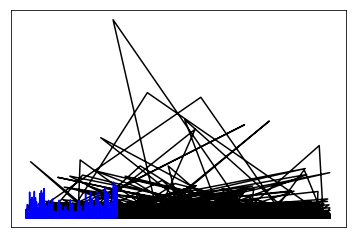

In [70]:
plt.plot (y_test,  color='black')
plt.plot(prediction, color='blue')
plt.xticks(())
plt.yticks(())

plt.show()

## RANDOM FOREST

In [32]:
RF = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, oob_score=True, n_jobs=1, random_state=None, verbose=0, warm_start=False)

In [33]:
RF.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [34]:
RF.feature_importances_

array([ 0.02586604,  0.02828198,  0.00914204,  0.0049906 ,  0.00800857,
        0.00764207,  0.00316011,  0.0047278 ,  0.04675509,  0.02687184,
        0.1008047 ,  0.0748134 ,  0.25984117,  0.10259691,  0.06773054,
        0.05812932,  0.02586145,  0.02835347,  0.1164229 ])

In [18]:
RF.n_outputs_

1

In [22]:
RF.fit_transform(X_train, Y_train)

/home/augusto/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[  1.44300000e+03,   3.00000000e+00,   3.00000000e+00, ...,
          3.00000000e+00,   1.84090000e-02,   1.25400000e+03],
       [  1.44300000e+03,   3.00000000e+00,   3.00000000e+00, ...,
          3.00000000e+00,   1.84090000e-02,   1.25400000e+03],
       [  1.44300000e+03,   3.00000000e+00,   3.00000000e+00, ...,
          3.00000000e+00,   1.84090000e-02,   1.25400000e+03],
       ..., 
       [  1.27200000e+03,   3.00000000e+00,   3.00000000e+00, ...,
          3.00000000e+00,   3.61270000e-02,   1.32300000e+03],
       [  1.27200000e+03,   3.00000000e+00,   3.00000000e+00, ...,
          3.00000000e+00,   3.61270000e-02,   1.32300000e+03],
       [  1.27200000e+03,   3.00000000e+00,   3.00000000e+00, ...,
          3.00000000e+00,   3.61270000e-02,   1.32300000e+03]])

In [35]:
prediction = RF.predict(X_test)
prediction

array([   744.96464286,    584.7255    ,   1172.86      , ...,
        20113.60166667,   2488.895     ,   4658.88166667])

In [36]:
print ("Error cuadratico medio: %.2f " % np.mean((prediction - Y_test)**2))

Error cuadratico medio: 1862640894.80 


## MLP REGRESSOR

In [67]:
from sklearn.neural_network import MLPRegressor

# Puedo variar el hidden_layer a mas grande o el random_state a mas grande
MLP = MLPRegressor(
    hidden_layer_sizes=(100,),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=0, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)


# BENCHMARK
## LINEAR_1 : Error cuadratico medio: 1849699707.76 
                                                    
## RANDOM FOREST:  Error cuadratico medio: 157041082.02

## GRADIENT BOOST: Error cuadratico medio: 52043963.30 
                                                                                
